# Alligators Don't Apologize - Exploratory Data Analysis

In [2]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## Load the datasets

### 1) CMU Dataset

In [4]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
CMU_movie_metadata.head(10)

# Load the character metadata
CMU_char_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/character.metadata.tsv', sep='\t', header=None)
CMU_char_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_release_date', 'character_name', 'actor_DOB', 'actor_gender', 'actor_height_meters', 'actor_ethnicity', 'actor_name', 'actor_age_at_movie_release', 'freebase_character_actor_map_ID', 'freebase_character_ID', 'freebase_actor_ID']

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

#######

# Include the other parts of the dataset if needed

######


### 2) GVD Dataset

In [12]:
# Load the GVD dataset
GVD_data = pd.read_csv(raw_data_folder+'GVD_Dataset/2023_gvdDatabase_1_0_country.csv')

### 3) Kaggle Movies Dataset

In [13]:
# Load the movies metadata
Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')

# Load the credits
Kaggle_credits = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/credits.csv')

# Load the keywords data
Kaggle_keywords = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/keywords.csv')

# Load the ratings
Kaggle_ratings = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/ratings.csv')

# Load the links
Kaggle_links = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/links.csv')

/var/folders/8z/vm21_w1s46v5nvgv_mq9wlrh0000gn/T/ipykernel_98616/3945269963.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')


### 4) Movies Body Count Dataset

In [14]:
# Load the movies body count data
movies_body_count = pd.read_csv(raw_data_folder+'Movies_Body_Count/movie_body_count.csv')

## Investigate the data

In [15]:
# Enable full display of the strings in the dataset
pd.set_option('display.max_colwidth', None)

## 1) Investigate the CMU Dataset

### Identify the most violent movies (physical violence) based on the plot summaries: (Emma's code)

In [5]:
violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


In [6]:
# Define the pattern for the parsing
pattern = r'\b(?:' + '|'.join(violent_words_list) + r')\b'

# Lower case the plot_summaries
CMU_plot_summary['plot_summary'] = CMU_plot_summary['plot_summary'].str.lower()

# Count the number of violent words from the violent_words_list in the plot_summary for each movie
CMU_plot_summary['total_vio_words'] = CMU_plot_summary['plot_summary'].str.count(pattern)

# Count the number of words in each plot summary
CMU_plot_summary['n_words_summary'] = CMU_plot_summary['plot_summary'].str.split().str.len()

# Calculate the "violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_plot_summary['total_vio_words_density'] = CMU_plot_summary['total_vio_words'] / CMU_plot_summary['n_words_summary']

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density
0,23890098,"shlykov, a hard-working taxi driver and lyosha...",1,25,0.040000
1,31186339,the nation of panem consists of a wealthy capi...,24,778,0.030848
2,20663735,poovalli induchoodan is sentenced for six yea...,16,496,0.032258
3,2231378,"the lemon drop kid , a new york city swindler,...",11,849,0.012956
4,595909,seventh-day adventist church pastor michael ch...,7,397,0.017632
...,...,...,...,...,...
42298,34808485,"the story is about reema , a young muslim scho...",1,40,0.025000
42299,1096473,"in 1928 hollywood, director leo andreyev look...",14,524,0.026718
42300,35102018,american luthier focuses on randy parsons’ tra...,0,160,0.000000
42301,8628195,"abdur rehman khan , a middle-aged dry fruit se...",2,230,0.008696


In [7]:
# Add the movie titles and the genres
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name', 'movie_genres']], on='wikipedia_movie_ID', how='left')

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density,movie_name,movie_genres
0,23890098,"shlykov, a hard-working taxi driver and lyosha...",1,25,0.040000,Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,the nation of panem consists of a wealthy capi...,24,778,0.030848,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,poovalli induchoodan is sentenced for six yea...,16,496,0.032258,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"the lemon drop kid , a new york city swindler,...",11,849,0.012956,The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,seventh-day adventist church pastor michael ch...,7,397,0.017632,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
...,...,...,...,...,...,...,...
42298,34808485,"the story is about reema , a young muslim scho...",1,40,0.025000,Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}"
42299,1096473,"in 1928 hollywood, director leo andreyev look...",14,524,0.026718,The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
42300,35102018,american luthier focuses on randy parsons’ tra...,0,160,0.000000,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music..."
42301,8628195,"abdur rehman khan , a middle-aged dry fruit se...",2,230,0.008696,Kabuliwala,"{""/m/07s9rl0"": ""Drama""}"


In [8]:
# sort the movies according to their violent words density in the plot summary
CMU_movies_sorted = CMU_plot_summary.sort_values(by='total_vio_words_density', ascending=False)
display(CMU_movies_sorted)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density,movie_name,movie_genres
6140,31304298,"during the first world war, russian forces att...",4,16,0.250000,13 Men and a Gun,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}"
6334,23923922,"two men join forces to build a cattle empire, ...",4,17,0.235294,American Empire,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":..."
10802,25011263,"during the korean war, a group of american sol...",7,32,0.218750,The Hook,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}"
17101,29003237,"during the second world war, georges masse und...",4,19,0.210526,Mission in Tangier,"{""/m/07s9rl0"": ""Drama""}"
24513,27424347,"an old, first world war soldier enlists with h...",5,25,0.200000,Old Bill and Son,"{""/m/01z4y"": ""Comedy""}"
...,...,...,...,...,...,...,...
19896,19248715,a charming british anthropology professor bruc...,0,138,0.000000,Bachelor Flat,"{""/m/03p5xs"": ""Comedy of manners"", ""/m/01z4y"":..."
872,12378414,"maaf, saya menghamili istri anda is an indones...",0,106,0.000000,"Maaf, Saya Telah Menghamili Istri Anda","{""/m/06cvj"": ""Romantic comedy""}"
19897,6304769,"in the film, ten friends who are children with...",0,147,0.000000,One Got Fat,"{""/m/02hmvc"": ""Short Film""}"
19903,31996104,broadway star fay lawrence is a temperamental...,0,22,0.000000,The Heat's On,"{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy""}"


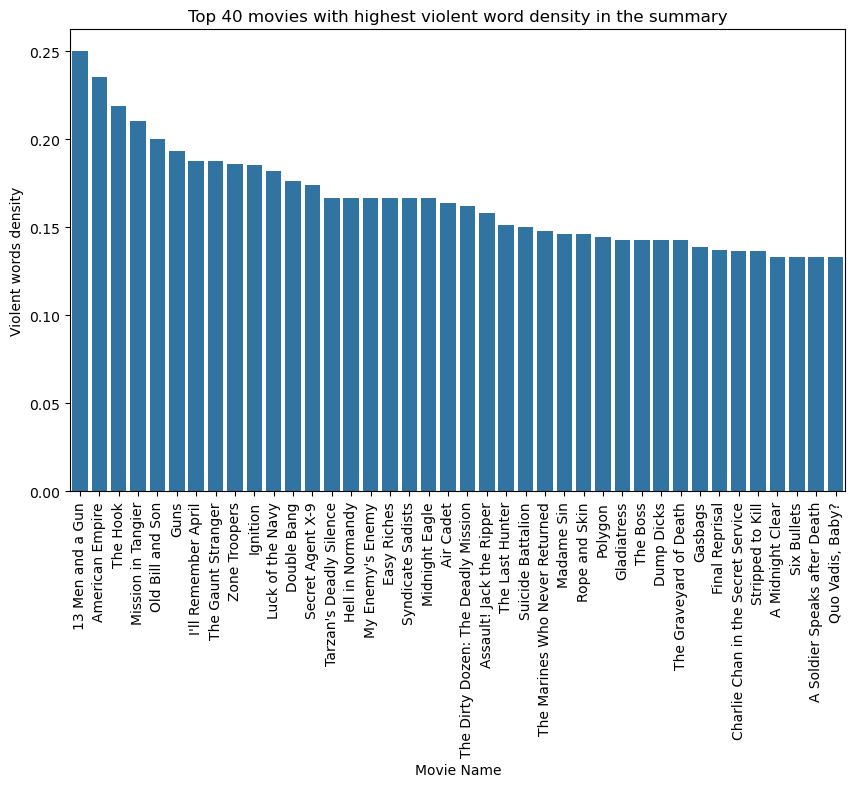

In [16]:
# Plot the results

top_movies = CMU_movies_sorted.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

## 2) Investigate the GVD Dataset

## 3) Investigate the Kaggle Dataset

First, we check the entirety of the columns:

In [10]:
Kaggle_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Check specifically all column values for one entry (movie: From Dusk Till Dawn) to inspect the datatypes of each column:

In [11]:
Kaggle_movies_metadata[Kaggle_movies_metadata['id']=='755']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0


Findings: Some of the columns are a stringified JSON object. This needs to be treated specifically for successful parsing.

Below is a way to first transform the JSON object "genre" into a string and then parsing for a specific word (in this case: Violence).

In [28]:
filtered_Kaggle_metadata = Kaggle_movies_metadata[Kaggle_movies_metadata['genres'].str.contains(r'\bCrime\b', na=False)]
filtered_Kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a top-notch crew on various insane heists throughout Los Angeles while a mentally unstable detective, Vincent Hanna pursues him without rest. Each man recognizes and respects the ability and the dedication of the other even though they are aware their cat-and-mouse game may end in violence.",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas – and its dark mafia underbelly.,...,1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0
17,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another.,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life.",Four Rooms,False,6.5,539.0
18,False,"{'id': 3167, 'name': 'Ace Ventura Collection', 'poster_path': '/qCxH543pScFed1CycwJ1nVgrkOc.jpg', 'backdrop_path': '/bswWgdDsLu0fhWMYUzLF8XgiK4h.jpg'}",30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 12, 'name': 'Adventure'}]",NaN,9273,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds himself on a perilous journey into the jungles of Africa to find Shikaka, the missing sacred animal of the friendly Wachati tribe. He must accomplish this before the wedding of the Wachati's Princess to the prince of the warrior Wachootoos. If Ace fails, the result will be a vicious tribal war.",...,1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0
19,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}]",NaN,11517,tt0113845,en,Money Train,"A vengeful New York transit cop decides to steal a trainload of subway fares; his foster brother, a fellow cop, tries to protect him.",...,1995-11-21,35431113.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Get on, or GET OUT THE WAY!",Money Train,False,5.4,224.0


We now define a list of violent words which we will use to parse through the keywords dataset in the Kaggle dataset:

In [34]:
# Violence keywords
violence_list = ['Murder','Kill','Assault','Abuse','Fight','War','Attack','Violence','Crime','Hostage','Revenge','Torture','Conflict','Terror']

We now use a pattern to parse through the "keywords" dataset and try to find all entries that contain at least one of the keywords in the violence_list.

In [35]:
# Define the pattern for the parsing
pattern = r'\b(?:' + '|'.join(violence_list) + r')\b'

# Filter the keywords dataframe for entries that contain any of the violence_dict
filtered_Kaggle_keywords = Kaggle_keywords[Kaggle_keywords['keywords'].str.contains(pattern, na=False, case=False)]

filtered_Kaggle_keywords.head()

,id,keywords
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, 'name': 'detective'}, {'id': 974, 'name': 'bank'}, {'id': 1523, 'name': 'obsession'}, {'id': 3713, 'name': 'chase'}, {'id': 7281, 'name': 'shooting'}, {'id': 9727, 'name': 'thief'}, {'id': 9812, 'name': 'honor'}, {'id': 9826, 'name': 'murder'}, {'id': 9937, 'name': 'suspense'}, {'id': 10051, 'name': 'heist'}, {'id': 10085, 'name': 'betrayal'}, {'id': 10594, 'name': 'money'}, {'id': 10726, 'name': 'gang'}, {'id': 15076, 'name': 'cat and mouse'}, {'id': 18023, 'name': 'criminal mastermind'}, {'id': 34117, 'name': 'cult film'}, {'id': 156121, 'name': 'ex-con'}, {'id': 159343, 'name': 'heist movie'}, {'id': 159434, 'name': 'one last job'}, {'id': 167104, 'name': 'loner'}, {'id': 192261, 'name': 'bank job'}, {'id': 207268, 'name': 'neo-noir'}, {'id': 208009, 'name': 'gun fight'}, {'id': 214983, 'name': 'crime epic'}]"
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562, 'name': 'hostage'}, {'id': 1653, 'name': 'explosive'}, {'id': 193533, 'name': 'vice president'}]"
12,21032,"[{'id': 1994, 'name': 'wolf'}, {'id': 6411, 'name': 'dog-sledding race'}, {'id': 9880, 'name': 'alaska'}, {'id': 15162, 'name': 'dog'}, {'id': 15169, 'name': 'goose'}, {'id': 158175, 'name': 'bear attack'}, {'id': 158370, 'name': 'dog sled'}, {'id': 158371, 'name': 'frozen lake'}]"
15,524,"[{'id': 383, 'name': 'poker'}, {'id': 726, 'name': 'drug abuse'}, {'id': 1228, 'name': '1970s'}, {'id': 2635, 'name': 'overdose'}, {'id': 33625, 'name': 'illegal prostitution'}]"
20,8012,"[{'id': 395, 'name': 'gambling'}, {'id': 416, 'name': 'miami'}, {'id': 818, 'name': 'based on novel'}, {'id': 8438, 'name': 'job'}, {'id': 9826, 'name': 'murder'}, {'id': 9935, 'name': 'travel'}, {'id': 10391, 'name': 'mafia'}, {'id': 10594, 'name': 'money'}, {'id': 11061, 'name': 'debt'}, {'id': 11578, 'name': 'mobster'}, {'id': 12094, 'name': 'business'}, {'id': 12396, 'name': 'hollywood'}, {'id': 13142, 'name': 'gangster'}, {'id': 14536, 'name': 'crime'}, {'id': 14819, 'name': 'violence'}, {'id': 14964, 'name': 'drug'}, {'id': 33879, 'name': 'producer'}, {'id': 159608, 'name': 'con'}]"
